# ANN Bank Customer Churn Prediction

Dataset: https://www.kaggle.com/datasets/radheshyamkollipara/bank-customer-churn

- RowNumber — corresponds to the record (row) number and has no effect on the output.
- CustomerId — contains random values and has no effect on customer leaving the bank.
- Surname — the surname of a customer has no impact on their decision to leave the bank.
- CreditScore — can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.
- Geography — a customer’s location can affect their decision to leave the bank.
- Gender — it’s interesting to explore whether gender plays a role in a customer leaving the bank.
- Age — this is certainly relevant, since older customers are less likely to leave their bank than younger ones.
- Tenure — refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.
- Balance — also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.
- NumOfProducts — refers to the number of products that a customer has purchased through the bank.
- HasCrCard — denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank.
- IsActiveMember — active customers are less likely to leave the bank.
- EstimatedSalary — as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.
- Exited — whether or not the customer left the bank.
- Complain — customer has complaint or not.
- Satisfaction Score — Score provided by the customer for their complaint resolution.
- Card Type — type of card hold by the customer.
- Points Earned — the points earned by the customer for using credit card.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Dataset

In [2]:
df0 = pd.read_csv('./Customer-Churn-Records.csv')
df = df0.copy()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

---

## Data Preprocessing

In [4]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339


In [5]:
df.columns = df.columns.str.lower()

In [6]:
df.columns.tolist()

['rownumber',
 'customerid',
 'surname',
 'creditscore',
 'geography',
 'gender',
 'age',
 'tenure',
 'balance',
 'numofproducts',
 'hascrcard',
 'isactivemember',
 'estimatedsalary',
 'exited',
 'complain',
 'satisfaction score',
 'card type',
 'point earned']

In [7]:
cols_to_rename = {
    'rownumber':'row_num',
    'customerid':'customer_id',
    'creditscore':'credit_score',
    'geography':'country',
    'numofproducts':'num_of_products',
    'hascrcard':'has_credit_card',
    'isactivemember':'is_active',
    'estimatedsalary':'estimated_salary',
    'complain':'complained',
    'satisfaction score':'satisfaction_score',
    'card type':'card_type',
    'point earned':'points_earned'
}

In [8]:
df = df.rename(columns=cols_to_rename)

In [9]:
df.columns.tolist()

['row_num',
 'customer_id',
 'surname',
 'credit_score',
 'country',
 'gender',
 'age',
 'tenure',
 'balance',
 'num_of_products',
 'has_credit_card',
 'is_active',
 'estimated_salary',
 'exited',
 'complained',
 'satisfaction_score',
 'card_type',
 'points_earned']

In [10]:
df['exited'] = df.pop('exited')

In [11]:
df

,row_num,customer_id,surname,credit_score,country,gender,age,tenure,balance,num_of_products,has_credit_card,is_active,estimated_salary,complained,satisfaction_score,card_type,points_earned,exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,2,DIAMOND,464,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,1,3,DIAMOND,456,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,3,DIAMOND,377,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,5,GOLD,350,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,5,GOLD,425,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,1,DIAMOND,300,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,5,PLATINUM,771,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,3,SILVER,564,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,2,GOLD,339,1


In [12]:
df.isna().sum()

# No Missing Values

row_num               0
customer_id           0
surname               0
credit_score          0
country               0
gender                0
age                   0
tenure                0
balance               0
num_of_products       0
has_credit_card       0
is_active             0
estimated_salary      0
complained            0
satisfaction_score    0
card_type             0
points_earned         0
exited                0
dtype: int64

In [13]:
df.duplicated().sum()

# No Duplicates

0

---

## EDA

In [14]:
df.columns.tolist()

['row_num',
 'customer_id',
 'surname',
 'credit_score',
 'country',
 'gender',
 'age',
 'tenure',
 'balance',
 'num_of_products',
 'has_credit_card',
 'is_active',
 'estimated_salary',
 'complained',
 'satisfaction_score',
 'card_type',
 'points_earned',
 'exited']

---

# exited - Target Variable

In [15]:
df['exited'].value_counts()

exited
0    7962
1    2038
Name: count, dtype: int64

In [16]:
# Map labels to Data for EDA

label_mapping = {
    0: 'Retained', 
    1: 'Exited'    
}
df['exited'] = df['exited'].replace(label_mapping)

df.head()

,row_num,customer_id,surname,credit_score,country,gender,age,tenure,balance,num_of_products,has_credit_card,is_active,estimated_salary,complained,satisfaction_score,card_type,points_earned,exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,2,DIAMOND,464,Exited
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,1,3,DIAMOND,456,Retained
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,3,DIAMOND,377,Exited
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,5,GOLD,350,Retained
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,5,GOLD,425,Retained


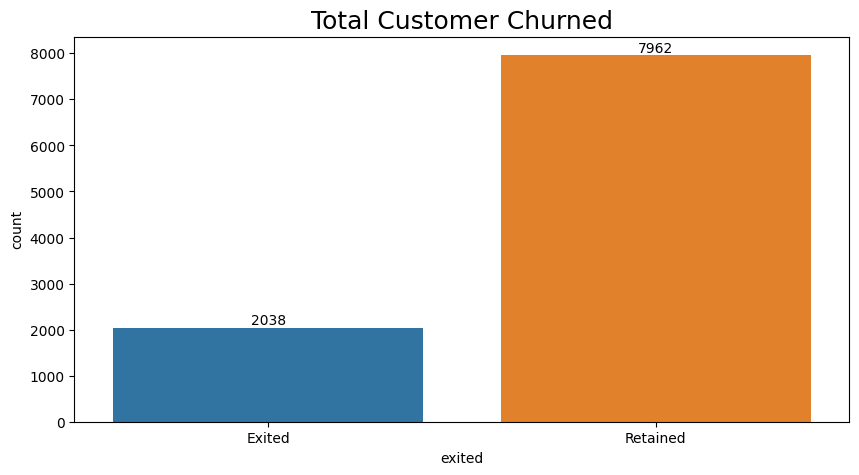

In [17]:
fig, ax = plt.subplots(figsize=(10, 5))

sns.countplot(
    data=df,
    x="exited",
    hue='exited'
)

ax.set_title("Total Customer Churned", fontsize=18)

for container in ax.containers:
    ax.bar_label(container)

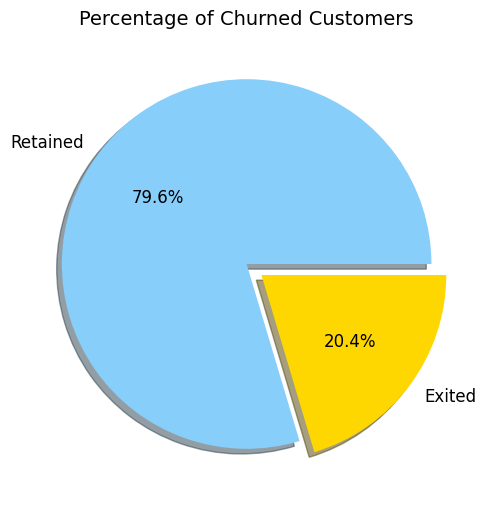

In [18]:
fig, ax = plt.subplots(figsize=(6, 6))

ax.pie(x=df.exited.value_counts().values,
       labels=df.exited.value_counts().index,
       autopct='%.1f%%',
       explode=(0, 0.1),
       colors=['lightskyblue', 'gold'],
       textprops={'fontsize': 12},
       shadow=True
       )

plt.title("Percentage of Churned Customers", fontdict = {'fontsize': 14})

plt.show()

---

# row_num 

`row_num` plays no role in the prediction and therefore needs to be removed.

In [19]:
df = df.drop('row_num',axis=1)

In [20]:
df.columns

Index(['customer_id', 'surname', 'credit_score', 'country', 'gender', 'age',
       'tenure', 'balance', 'num_of_products', 'has_credit_card', 'is_active',
       'estimated_salary', 'complained', 'satisfaction_score', 'card_type',
       'points_earned', 'exited'],
      dtype='object')

# customer_id

`customer_id` plays no role in the prediction and therefore needs to be removed.

In [21]:
df = df.drop('customer_id',axis=1)

In [22]:
df.columns

Index(['surname', 'credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'num_of_products', 'has_credit_card', 'is_active',
       'estimated_salary', 'complained', 'satisfaction_score', 'card_type',
       'points_earned', 'exited'],
      dtype='object')

# surname

`surname` plays no role in the prediction and therefore needs to be removed.

In [23]:
surname_count_top50 = df['surname'].value_counts().head(50).sort_values(ascending=True)

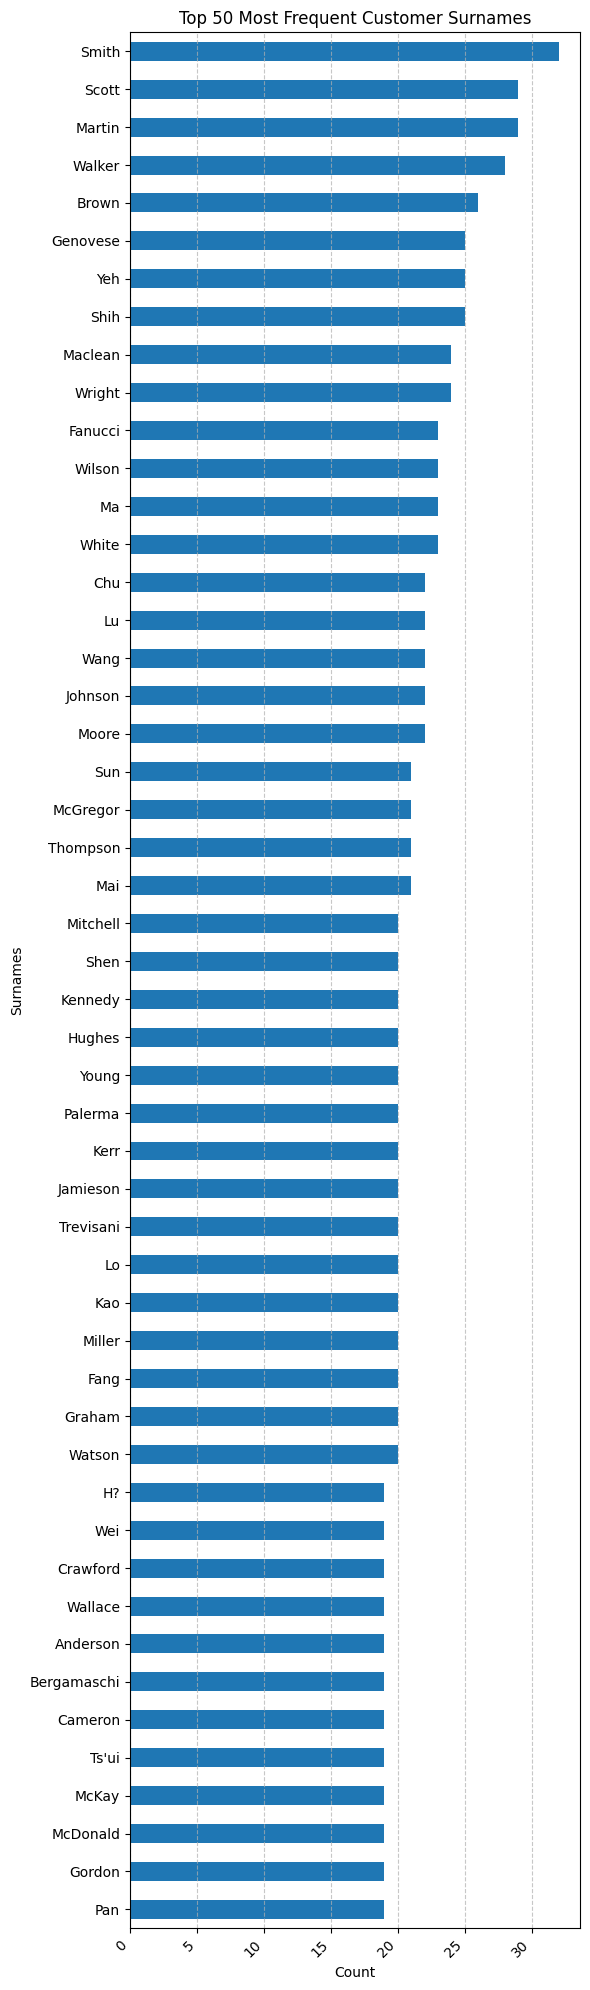

In [24]:
plt.figure(figsize=(6,20))
surname_count_top50.plot(kind='barh')

plt.title('Top 50 Most Frequent Customer Surnames')
plt.xlabel('Count')
plt.ylabel('Surnames')

plt.xticks(rotation=45,ha='right')
plt.grid(axis='x',linestyle='--',alpha=0.7)
plt.tight_layout()

plt.show()

In [25]:
df = df.drop('surname',axis=1)

In [26]:
df.columns

Index(['credit_score', 'country', 'gender', 'age', 'tenure', 'balance',
       'num_of_products', 'has_credit_card', 'is_active', 'estimated_salary',
       'complained', 'satisfaction_score', 'card_type', 'points_earned',
       'exited'],
      dtype='object')

# credit_score

In [27]:
df['credit_score'].describe()

count    10000.000000
mean       650.528800
std         96.653299
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max        850.000000
Name: credit_score, dtype: float64

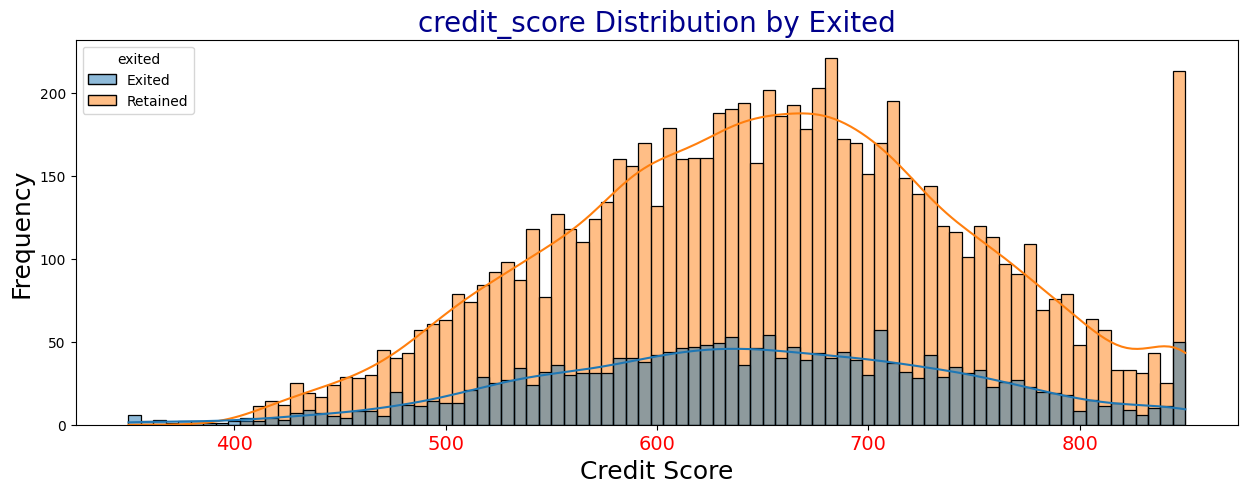

In [28]:
plt.figure(figsize=(15, 5))

sns.histplot(data=df,
             x="credit_score",
             bins=85,
             kde=True,
             hue="exited")

plt.title("credit_score Distribution by Exited", fontsize=20, color="darkblue")
plt.xlabel("Credit Score", fontsize=18)
plt.ylabel("Frequency", fontsize=18)
plt.xticks(fontsize=14, color='red')

plt.show();

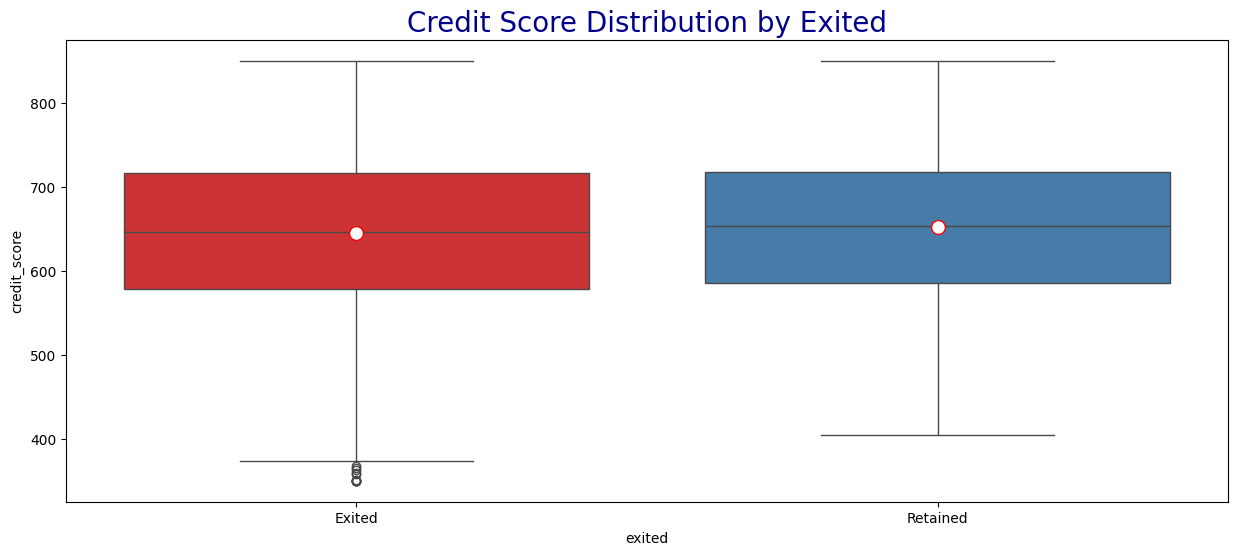

In [29]:
plt.figure(figsize=(15,6))

sns.boxplot(
    data=df,
    x="exited", # Use the categorical variable 'exited' here
    y="credit_score", # Use the numerical variable 'credit_score' here
    showmeans=True,
    meanprops={"marker":"o",
                "markerfacecolor":"white",
                "markeredgecolor":"red",
                "markersize":"10"},
    palette='Set1',
    hue='exited'
)

plt.title("Credit Score Distribution by Exited", fontsize=20, color="darkblue");

In [30]:
df.groupby("exited").credit_score.describe()

,count,mean,std,min,25%,50%,75%,max
exited,,,,,,,,
Exited,2038.0,645.414622,100.337351,350.0,578.0,646.0,716.0,850.0
Retained,7962.0,651.837855,95.650047,405.0,585.0,653.0,718.0,850.0


`credit_score` seems to play little role in the prediction.

### 

# country

In [31]:
df['country'].value_counts()

country
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [32]:
df.groupby('country').exited.value_counts()

country  exited  
France   Retained    4203
         Exited       811
Germany  Retained    1695
         Exited       814
Spain    Retained    2064
         Exited       413
Name: count, dtype: int64

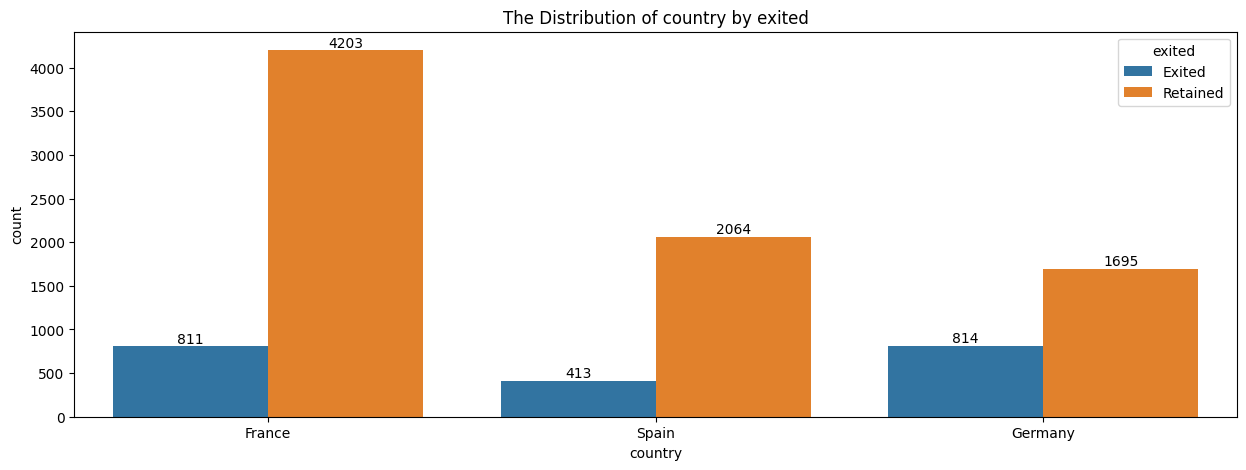

In [33]:
plt.figure(figsize=(15,5))

ax = sns.countplot(data=df,x='country',hue='exited')

plt.title('The Distribution of country by exited')

for container in ax.containers:
    ax.bar_label(container)

In [34]:
ctry = df.groupby('country').exited.value_counts(normalize=True)

In [35]:
ctry

country  exited  
France   Retained    0.838253
         Exited      0.161747
Germany  Retained    0.675568
         Exited      0.324432
Spain    Retained    0.833266
         Exited      0.166734
Name: proportion, dtype: float64

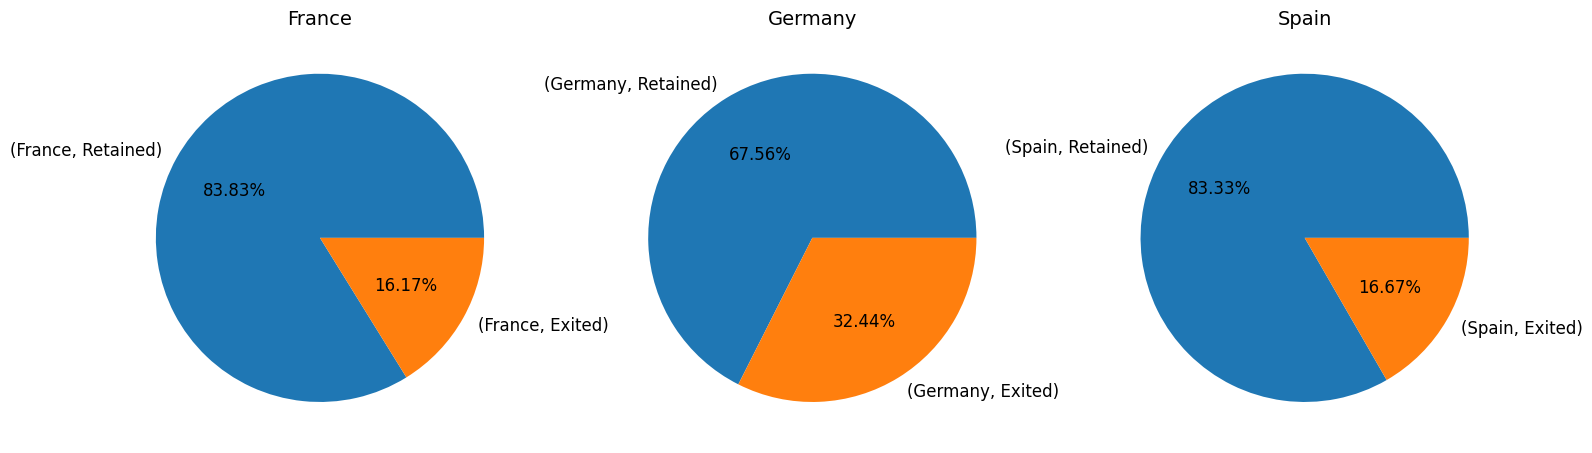

In [36]:
plt.figure(figsize=(18,6))

index = 1

for i in [0,2,4]:
    plt.subplot(1,3,index)
    ctry[i:i+2].plot.pie(
        subplots=True,
        autopct='%.2f%%',
        textprops={
            'fontsize':12
        },
        color=['red','blue']
    )
    plt.title(ctry.index[i][0], fontdict={'fontsize':14})

    plt.ylabel('') 

    index+=1


`Germany` has more exited customers in comparison to the others.

# gender

In [37]:
df['gender'].value_counts()

gender
Male      5457
Female    4543
Name: count, dtype: int64

In [38]:
df.groupby('exited').gender.value_counts()

exited    gender
Exited    Female    1139
          Male       899
Retained  Male      4558
          Female    3404
Name: count, dtype: int64

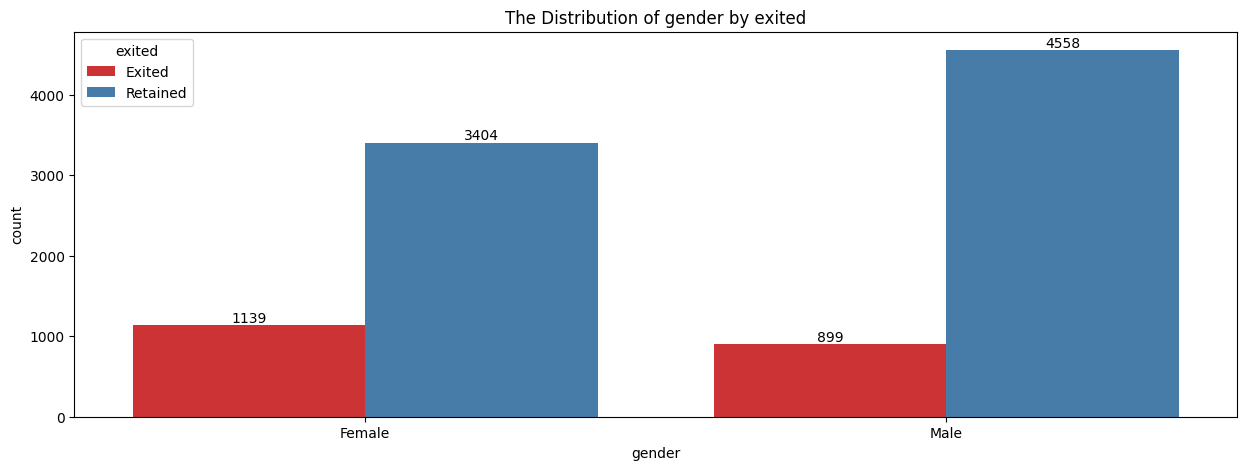

In [39]:
plt.figure(figsize=(15,5))

ax = sns.countplot(data=df,x='gender',hue='exited',palette='Set1')

plt.title('The Distribution of gender by exited')

for container in ax.containers:
    ax.bar_label(container)

In [40]:
gender = df.groupby('exited').gender.value_counts(normalize=True, sort=False)

In [41]:
gender

exited    gender
Exited    Female    0.558881
          Male      0.441119
Retained  Female    0.427531
          Male      0.572469
Name: proportion, dtype: float64

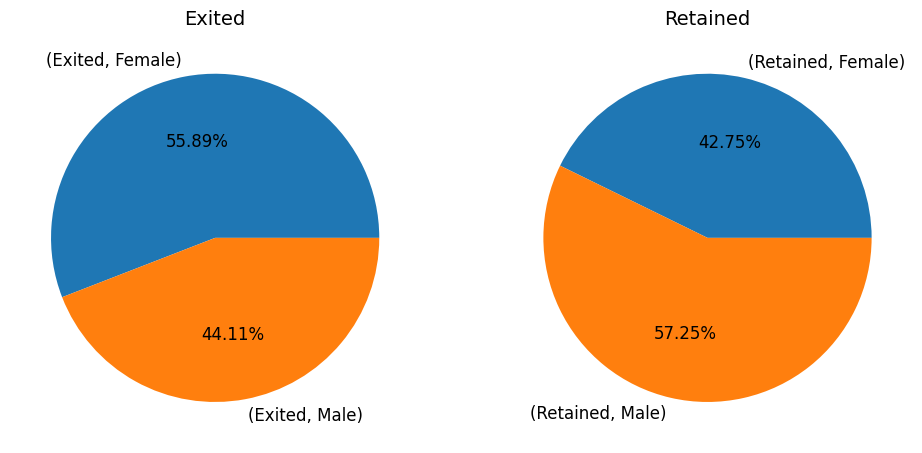

In [42]:
plt.figure(figsize=(18,6))

index = 1

for i in [0,2]:
    plt.subplot(1,3,index)
    gender[i:i+2].plot.pie(
        subplots=True,
        autopct="%.2f%%",
        textprops={
            'fontsize':12
        },
        color=['red','blue']
    )
    plt.title(gender.index[i][0], fontdict={'fontsize':14})
    plt.ylabel('') 

    index+=1


`Female` customers have exited more.

# age

In [43]:
df['age'].describe()

count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: age, dtype: float64

In [44]:
df.groupby("exited").age.describe()

,count,mean,std,min,25%,50%,75%,max
exited,,,,,,,,
Exited,2038.0,44.835623,9.759754,18.0,38.0,45.0,51.0,84.0
Retained,7962.0,37.408063,10.125957,18.0,31.0,36.0,41.0,92.0


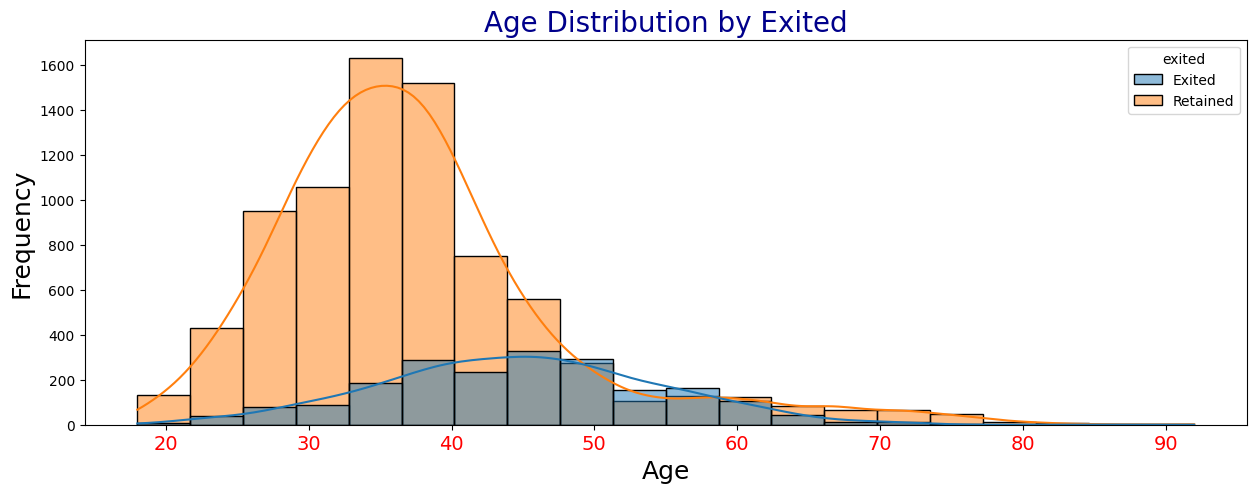

In [45]:
plt.figure(figsize=(15, 5))

sns.histplot(data=df,
             x="age",
             bins=20,
             kde=True,
             hue="exited")

plt.title("Age Distribution by Exited", fontsize=20, color="darkblue")
plt.xlabel("Age", fontsize=18)
plt.ylabel("Frequency", fontsize=18)
plt.xticks(fontsize=14, color='red')

plt.show();

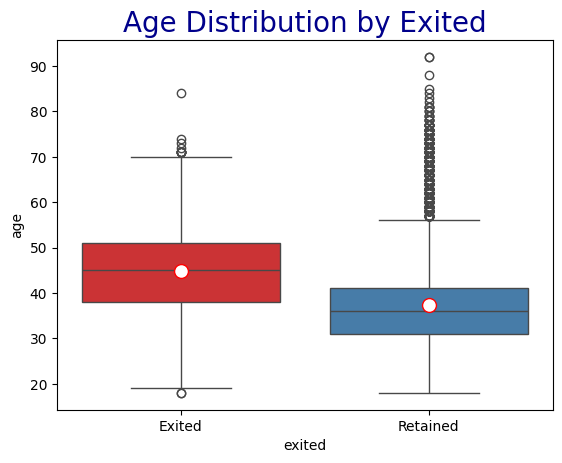

In [46]:
sns.boxplot(data=df,
            x="exited",
            y="age",
            showmeans=True,
            palette='Set1',
            hue='exited',
            meanprops={"marker":"o",
                       "markerfacecolor":"white",
                       "markeredgecolor":"red",
                       "markersize":"10"})

plt.title("Age Distribution by Exited", fontsize=20, color="darkblue");

The exited customers are `on average, 45 yrs old`

# tenure

In [47]:
df['tenure'].describe()

count    10000.000000
mean         5.012800
std          2.892174
min          0.000000
25%          3.000000
50%          5.000000
75%          7.000000
max         10.000000
Name: tenure, dtype: float64

In [48]:
df['tenure'].value_counts()

tenure
2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: count, dtype: int64

In [49]:
df.groupby('exited').tenure.describe()

,count,mean,std,min,25%,50%,75%,max
exited,,,,,,,,
Exited,2038.0,4.934740,2.936768,0.0,2.0,5.0,8.0,10.0
Retained,7962.0,5.032781,2.880496,0.0,3.0,5.0,7.0,10.0


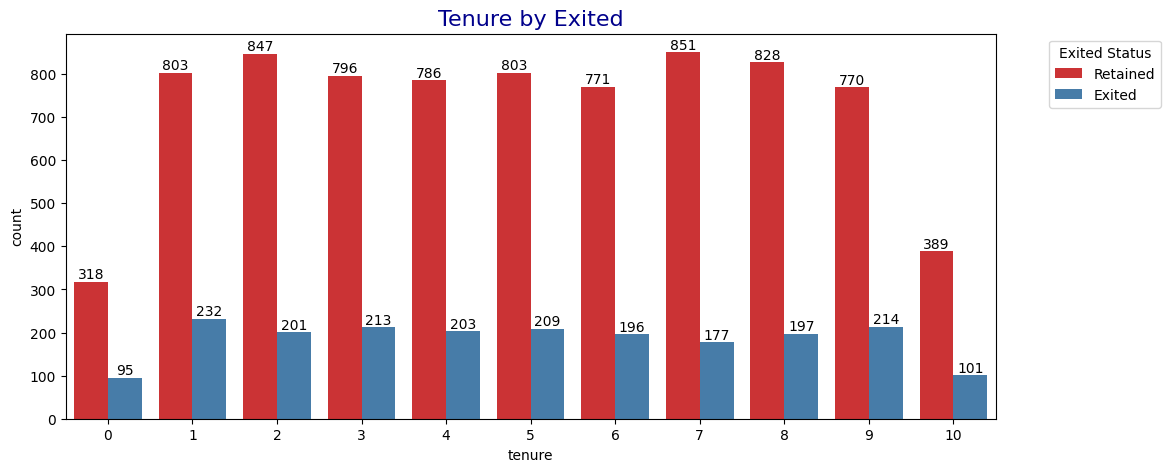

In [50]:
plt.figure(figsize=(12, 5))

ax = sns.countplot(data=df, x="tenure", hue='exited', palette='Set1')

plt.title("Tenure by Exited", fontsize=16, color="darkblue")

ax.legend(
    title='Exited Status', 
    # This specifies the bounding box location for the legend
    # (x, y, width, height) in axes coordinates.
    # (1.05, 1) means 5% to the right of the right edge and at the top edge.
    bbox_to_anchor=(1.05, 1), 
    # 'upper left' places the upper-left corner of the legend box 
    # at the bbox_to_anchor coordinates.
    loc='upper left' 
)

for container in ax.containers:
    ax.bar_label(container);

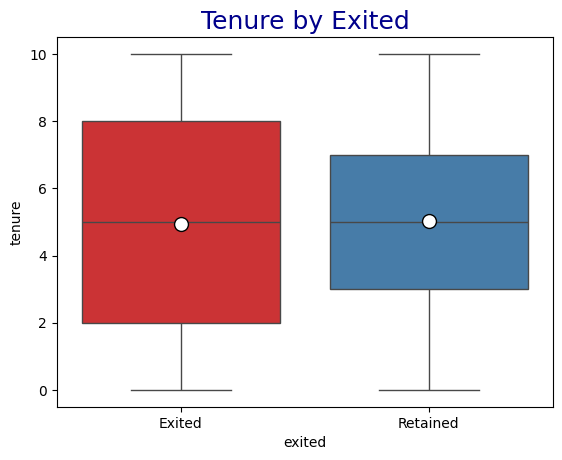

In [51]:
sns.boxplot(data=df,
            x="exited",
            y="tenure",
            palette='Set1',
            hue='exited',
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white",
                       "markeredgecolor":"black",
                       "markersize":"10"})


plt.title("Tenure by Exited", fontsize=18, color='darkblue')

plt.show();

`Tenure` doesn't seem to play a role in customer churn. The average tenure is 5 yrs.

# balance

In [52]:
df['balance'].describe()

count     10000.000000
mean      76485.889288
std       62397.405202
min           0.000000
25%           0.000000
50%       97198.540000
75%      127644.240000
max      250898.090000
Name: balance, dtype: float64

In [53]:
df.groupby('exited').balance.describe()

,count,mean,std,min,25%,50%,75%,max
exited,,,,,,,,
Exited,2038.0,91109.476006,58346.483197,0.0,38591.2225,109344.23,131423.6375,250898.09
Retained,7962.0,72742.750663,62851.577108,0.0,0.0000,92063.06,126419.3300,221532.80


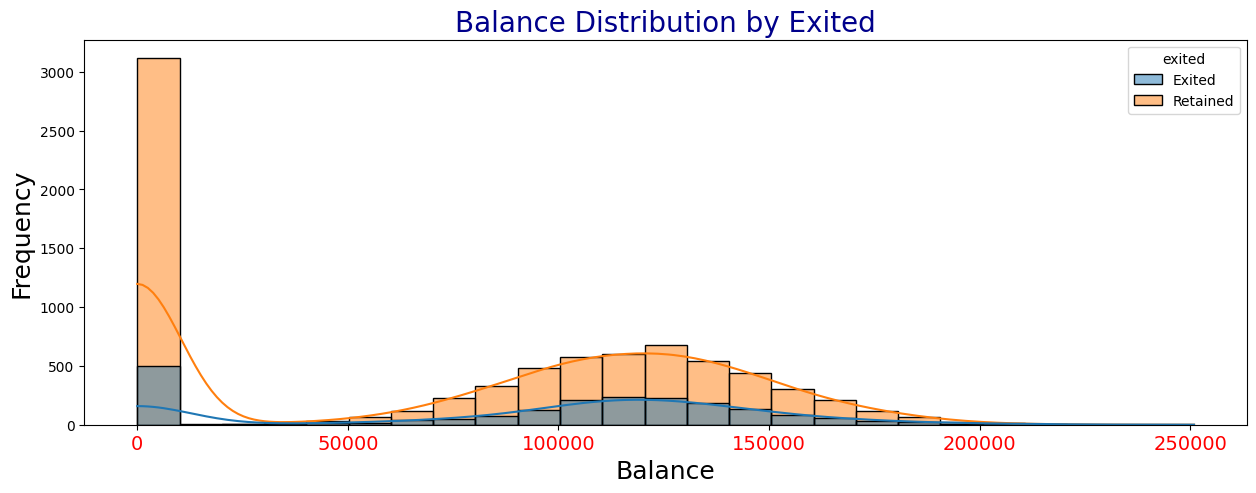

In [54]:
plt.figure(figsize=(15, 5))

sns.histplot(data=df,
             x="balance",
             bins=25,
             kde=True,
             hue="exited")

plt.title("Balance Distribution by Exited", fontsize=20, color="darkblue")
plt.xlabel("Balance", fontsize=18)
plt.ylabel("Frequency", fontsize=18)
plt.xticks(fontsize=14, color='red')

plt.show();

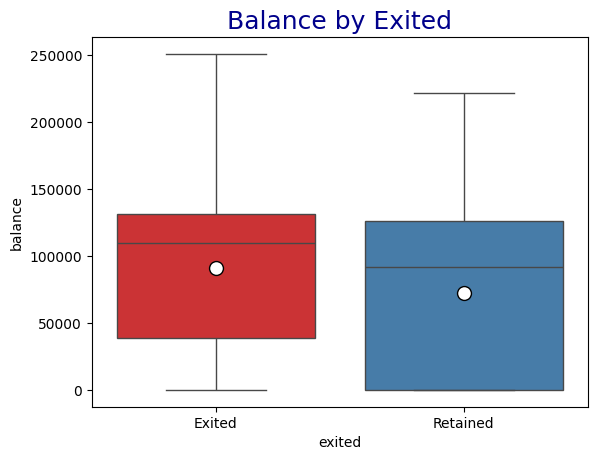

In [55]:
sns.boxplot(data=df,
            x="exited",
            y="balance",
            palette='Set1',
            hue='exited',
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white",
                       "markeredgecolor":"black",
                       "markersize":"10"})


plt.title("Balance by Exited", fontsize=18, color='darkblue')

plt.show();

The exited customers have `the avg balance of 91109.476006 EUR`, while the retained customers have `72742.750663 EUR on avg`.

# num_of_products

In [56]:
df['num_of_products'].value_counts()

num_of_products
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64

In [57]:
df.groupby('exited').num_of_products.value_counts()

exited    num_of_products
Exited    1                  1409
          2                   349
          3                   220
          4                    60
Retained  2                  4241
          1                  3675
          3                    46
Name: count, dtype: int64

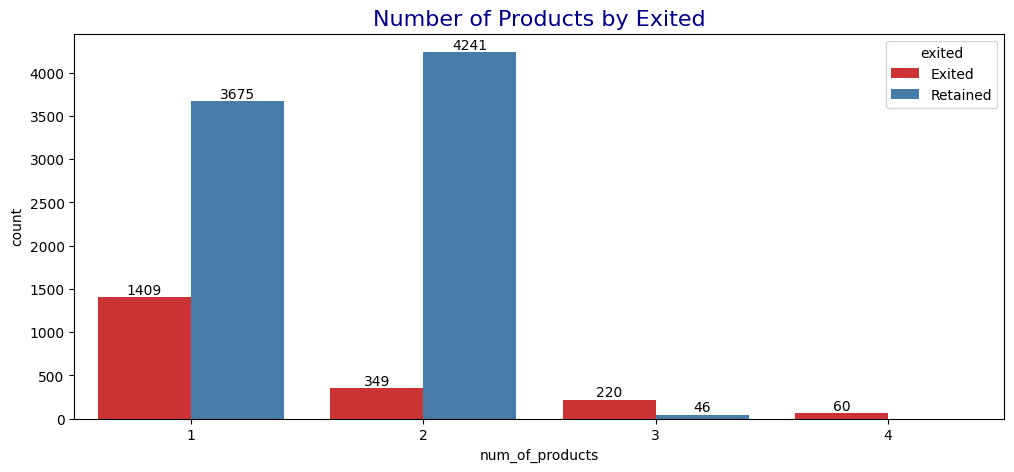

In [58]:
plt.figure(figsize=(12, 5))

ax = sns.countplot(data=df, x="num_of_products", hue='exited', palette='Set1')

plt.title("Number of Products by Exited", fontsize=16, color="darkblue")

for container in ax.containers:
    ax.bar_label(container);

In [59]:
num_of_prods = df.groupby('exited').num_of_products.value_counts(normalize=True, sort=False).reset_index(name="percentage")

In [60]:
num_of_prods

,exited,num_of_products,percentage
0,Exited,1,0.691364
1,Exited,2,0.171246
2,Exited,3,0.107949
3,Exited,4,0.029441
4,Retained,1,0.461567
5,Retained,2,0.532655
6,Retained,3,0.005777


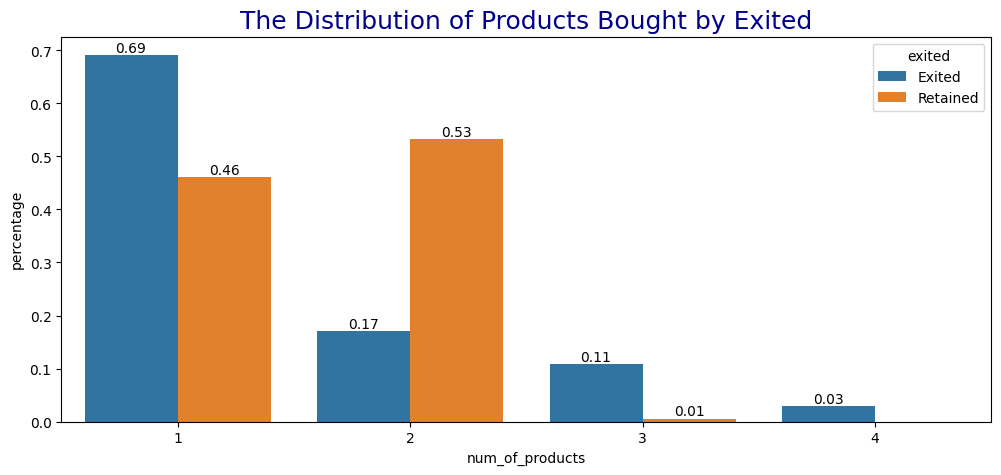

In [61]:
nop_pct = num_of_prods

fig, ax = plt.subplots(figsize=(12, 5))

ax = sns.barplot(data=nop_pct,
                 x="num_of_products",
                 y="percentage",
                 hue="exited",
                 order=nop_pct.groupby("num_of_products").percentage.sum().sort_values(ascending=False).index)

plt.title("The Distribution of Products Bought by Exited", fontsize=18, color="darkblue")
plt.xticks(rotation=0)

for container in ax.containers:
    ax.bar_label(container, fmt="%.2f");

Most exited customers only had `1 product`.
Most retained customers have `2 products`. 

# has_credit_card

In [62]:
df['has_credit_card'].value_counts()

has_credit_card
1    7055
0    2945
Name: count, dtype: int64

In [63]:
has_cr_card = df.groupby('exited').has_credit_card.value_counts(normalize=True)

In [64]:
has_cr_card

exited    has_credit_card
Exited    1                  0.699215
          0                  0.300785
Retained  1                  0.707109
          0                  0.292891
Name: proportion, dtype: float64

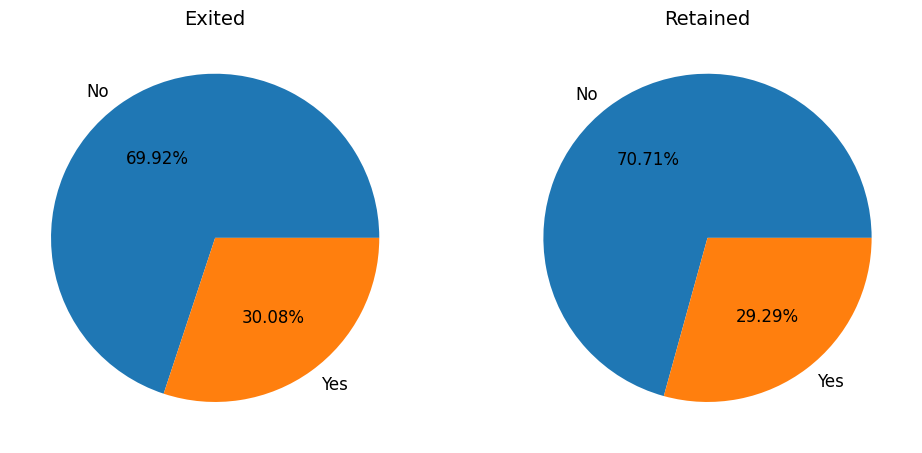

In [65]:
# The labels corresponding to the likely index values [0, 1]
pie_labels = ['No', 'Yes']

plt.figure(figsize=(18,6))

index = 1

for i in [0,2]:
    plt.subplot(1,3,index)
    has_cr_card[i:i+2].plot.pie(
        subplots=True,
        autopct="%.2f%%",
        labels=pie_labels,
        textprops={
            'fontsize':12
        },
        color=['red','blue']
    )
    plt.title(has_cr_card.index[i][0], fontdict={'fontsize':14})
    
    plt.ylabel('') 

    index+=1

plt.show()

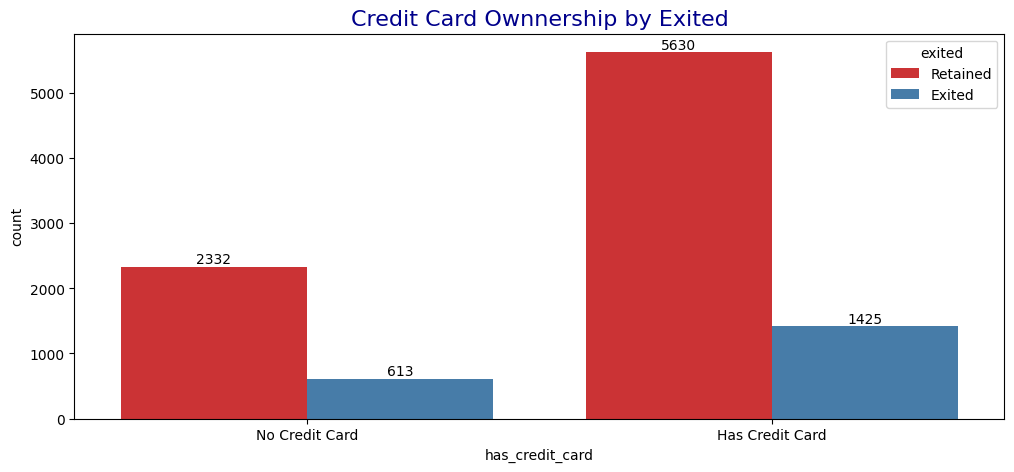

In [66]:
plt.figure(figsize=(12, 5))

ax = sns.countplot(data=df, x="has_credit_card", hue='exited', palette='Set1')

ax.set_xticks([0, 1])
ax.set_xticklabels(['No Credit Card', 'Has Credit Card'])

plt.title("Credit Card Ownnership by Exited", fontsize=16, color="darkblue")


for container in ax.containers:
    ax.bar_label(container);

`Credit card ownnership` doesn't seem to play a role in predicting customer churn in this case.

# is_active

In [67]:
df['is_active'].value_counts()

is_active
1    5151
0    4849
Name: count, dtype: int64

In [68]:
isactive = df.groupby('exited').is_active.value_counts(normalize=True, sort=False)

In [69]:
isactive

exited    is_active
Exited    0            0.639352
          1            0.360648
Retained  0            0.445365
          1            0.554635
Name: proportion, dtype: float64

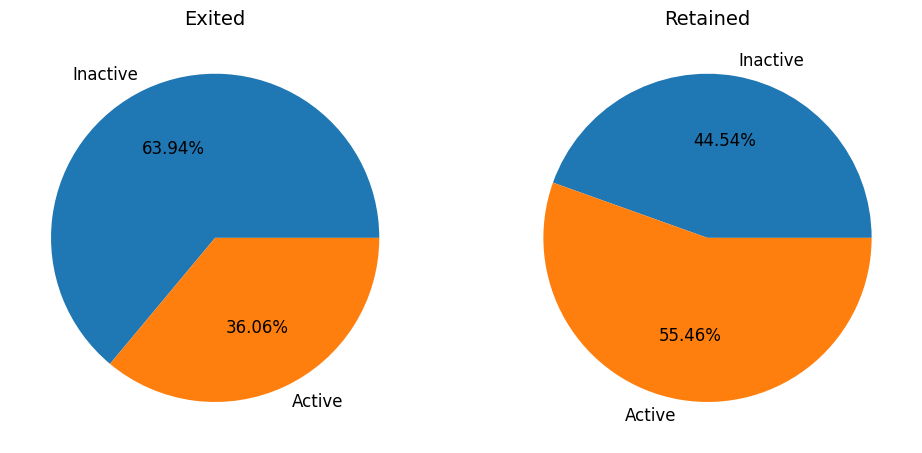

In [70]:
# The labels corresponding to the likely index values [0, 1]
pie_labels = ['Inactive', 'Active']

plt.figure(figsize=(18,6))

index = 1

for i in [0,2]:
    plt.subplot(1,3,index)
    isactive[i:i+2].plot.pie(
        subplots=True,
        autopct="%.2f%%",
        labels=pie_labels,
        textprops={
            'fontsize':12
        },
        color=['red','blue']
    )
    plt.title(isactive.index[i][0], fontdict={'fontsize':14})
    
    plt.ylabel('') 

    index+=1

plt.show()

Most exited customers are `inactive`

# estimated_salary

In [71]:
df['estimated_salary'].describe()

count     10000.000000
mean     100090.239881
std       57510.492818
min          11.580000
25%       51002.110000
50%      100193.915000
75%      149388.247500
max      199992.480000
Name: estimated_salary, dtype: float64

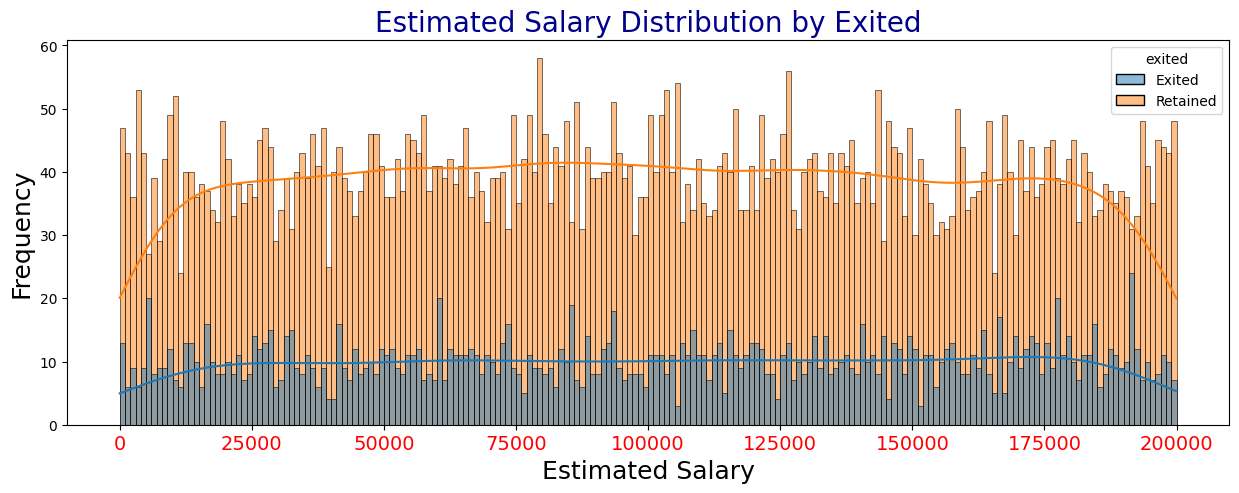

In [72]:
plt.figure(figsize=(15, 5))

sns.histplot(data=df,
             x="estimated_salary",
             bins=200,
             kde=True,
             hue="exited")

plt.title("Estimated Salary Distribution by Exited", fontsize=20, color="darkblue")
plt.xlabel("Estimated Salary", fontsize=18)
plt.ylabel("Frequency", fontsize=18)
plt.xticks(fontsize=14, color='red')

plt.show();

In [73]:
df.groupby('exited').estimated_salary.describe()

,count,mean,std,min,25%,50%,75%,max
exited,,,,,,,,
Exited,2038.0,101509.908783,57932.623392,11.58,51924.020,102489.335,152443.8575,199808.10
Retained,7962.0,99726.853141,57399.956717,90.07,50783.295,99620.355,148602.4450,199992.48


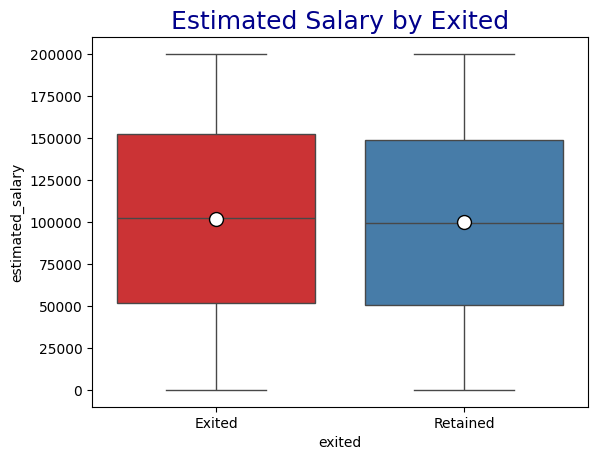

In [74]:
sns.boxplot(data=df,
            x="exited",
            y="estimated_salary",
            palette='Set1',
            hue='exited',
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white",
                       "markeredgecolor":"black",
                       "markersize":"10"})


plt.title("Estimated Salary by Exited", fontsize=18, color='darkblue')

plt.show();

`Estimated Salary` doesn't seem to play a role in predicting the customer churn in this case.

# complained

In [75]:
df['complained'].value_counts()

complained
0    7956
1    2044
Name: count, dtype: int64

In [76]:
cmplnd = df.groupby('exited').complained.value_counts(normalize=True, sort=False)

In [77]:
cmplnd

exited    complained
Exited    0             0.001963
          1             0.998037
Retained  0             0.998744
          1             0.001256
Name: proportion, dtype: float64

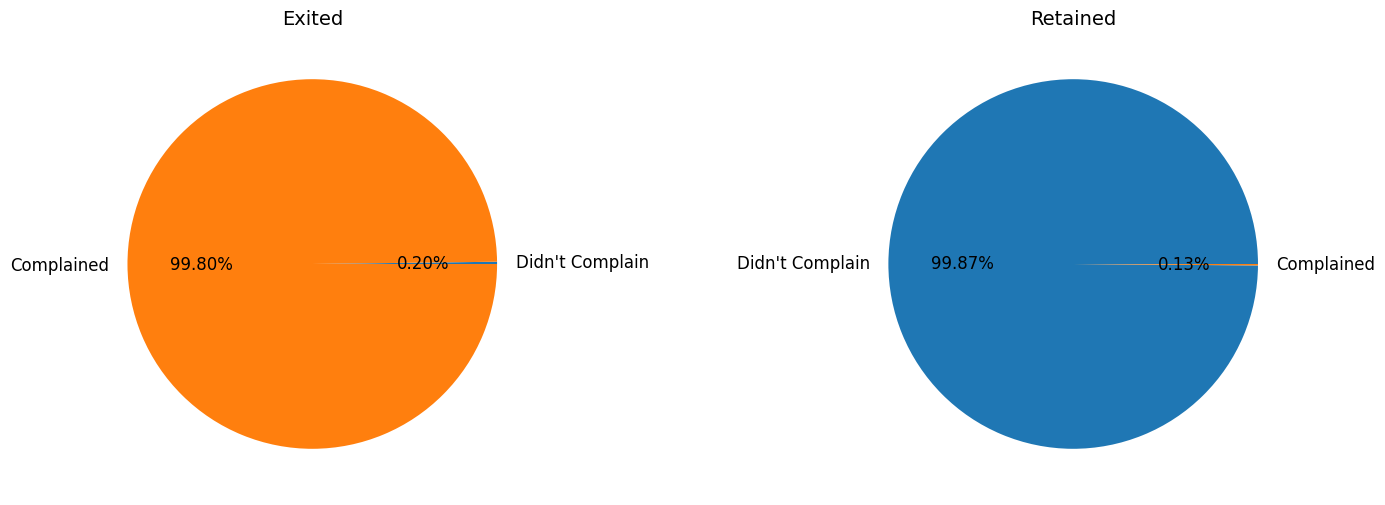

In [78]:
# The labels corresponding to the likely index values [0, 1]
pie_labels = ['Didn\'t Complain', 'Complained']

plt.figure(figsize=(18,6))

index = 1

for i in [0,2]:
    plt.subplot(1,2,index)
    cmplnd[i:i+2].plot.pie(
        subplots=True,
        autopct="%.2f%%",
        labels=pie_labels,
        textprops={
            'fontsize':12
        },
        color=['red','blue']
    )
    plt.title(cmplnd.index[i][0], fontdict={'fontsize':14})
    
    plt.ylabel('') 

    index+=1

plt.show()

Exited customers are very much likely to have `complained`.

# satisfaction_score

In [79]:
df['satisfaction_score'].describe()

count    10000.000000
mean         3.013800
std          1.405919
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: satisfaction_score, dtype: float64

In [80]:
df.groupby('exited')['satisfaction_score'].value_counts(normalize=True, sort=False)

exited    satisfaction_score
Exited    1                     0.189892
          2                     0.215407
          3                     0.196762
          4                     0.203140
          5                     0.194799
Retained  1                     0.194047
          2                     0.197815
          3                     0.206104
          4                     0.200201
          5                     0.201834
Name: proportion, dtype: float64

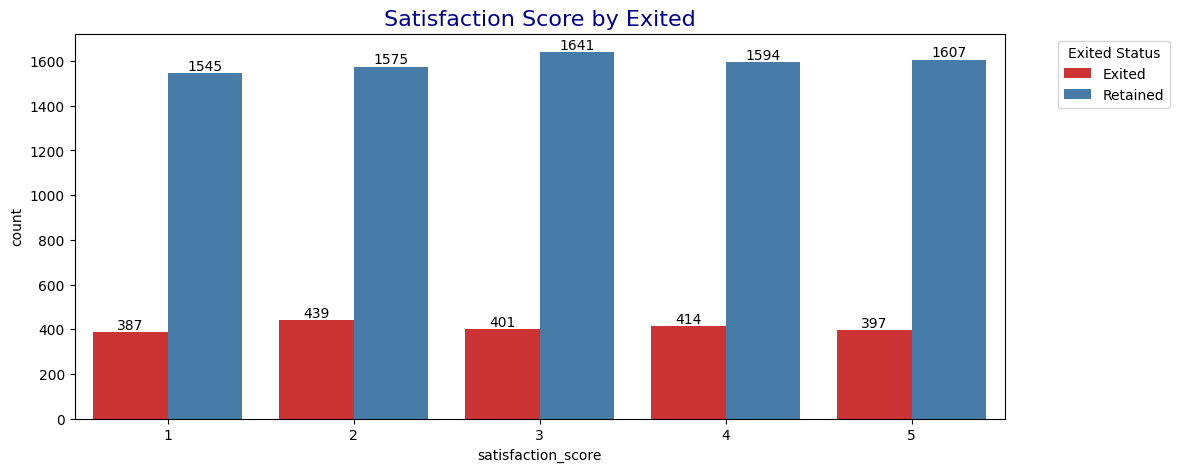

In [81]:
plt.figure(figsize=(12, 5))

ax = sns.countplot(data=df, x="satisfaction_score", hue='exited', palette='Set1')

plt.title("Satisfaction Score by Exited", fontsize=16, color="darkblue")

ax.legend(
    title='Exited Status', 
    # This specifies the bounding box location for the legend
    # (x, y, width, height) in axes coordinates.
    # (1.05, 1) means 5% to the right of the right edge and at the top edge.
    bbox_to_anchor=(1.05, 1), 
    # 'upper left' places the upper-left corner of the legend box 
    # at the bbox_to_anchor coordinates.
    loc='upper left' 
)

for container in ax.containers:
    ax.bar_label(container);

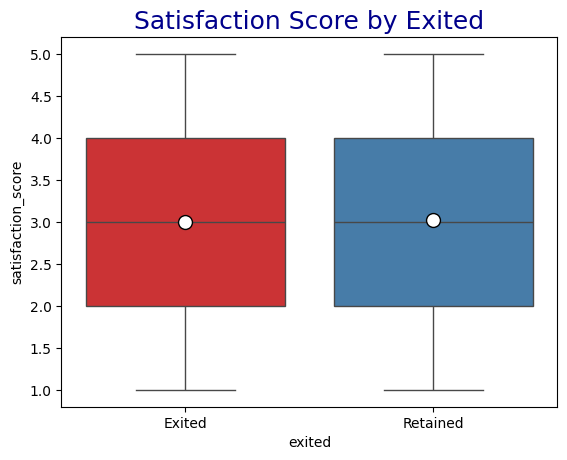

In [82]:
sns.boxplot(data=df,
            x="exited",
            y="satisfaction_score",
            palette='Set1',
            hue='exited',
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white",
                       "markeredgecolor":"black",
                       "markersize":"10"})


plt.title("Satisfaction Score by Exited", fontsize=18, color='darkblue')

plt.show();

`Satisfaction Score` doesn't seem to play a role in predicting customer churn in this case.

# card_type

In [83]:
df['card_type'].value_counts()

card_type
DIAMOND     2507
GOLD        2502
SILVER      2496
PLATINUM    2495
Name: count, dtype: int64

In [84]:
df.groupby('exited').card_type.value_counts(normalize=True, sort=False)

exited    card_type
Exited    DIAMOND      0.267910
          GOLD         0.236506
          PLATINUM     0.249264
          SILVER       0.246320
Retained  DIAMOND      0.246295
          GOLD         0.253705
          PLATINUM     0.249560
          SILVER       0.250440
Name: proportion, dtype: float64

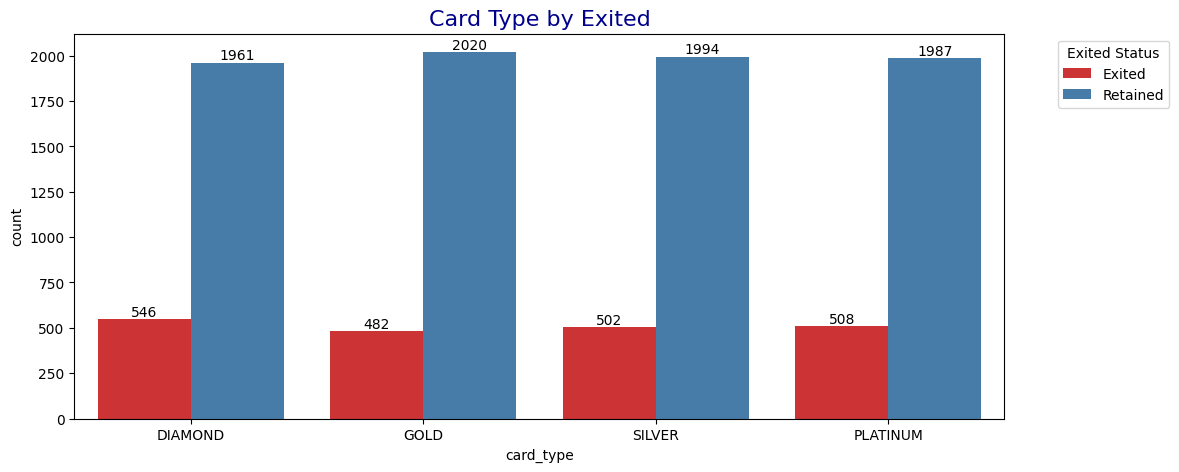

In [85]:
plt.figure(figsize=(12, 5))

ax = sns.countplot(data=df, x="card_type", hue='exited', palette='Set1')

plt.title("Card Type by Exited", fontsize=16, color="darkblue")

ax.legend(
    title='Exited Status', 
    # This specifies the bounding box location for the legend
    # (x, y, width, height) in axes coordinates.
    # (1.05, 1) means 5% to the right of the right edge and at the top edge.
    bbox_to_anchor=(1.05, 1), 
    # 'upper left' places the upper-left corner of the legend box 
    # at the bbox_to_anchor coordinates.
    loc='upper left' 
)

for container in ax.containers:
    ax.bar_label(container);

`Card type` doesn't seem to play a role in predicting customer churn in this case.

# points_earned

In [86]:
df['points_earned'].describe()

count    10000.000000
mean       606.515100
std        225.924839
min        119.000000
25%        410.000000
50%        605.000000
75%        801.000000
max       1000.000000
Name: points_earned, dtype: float64

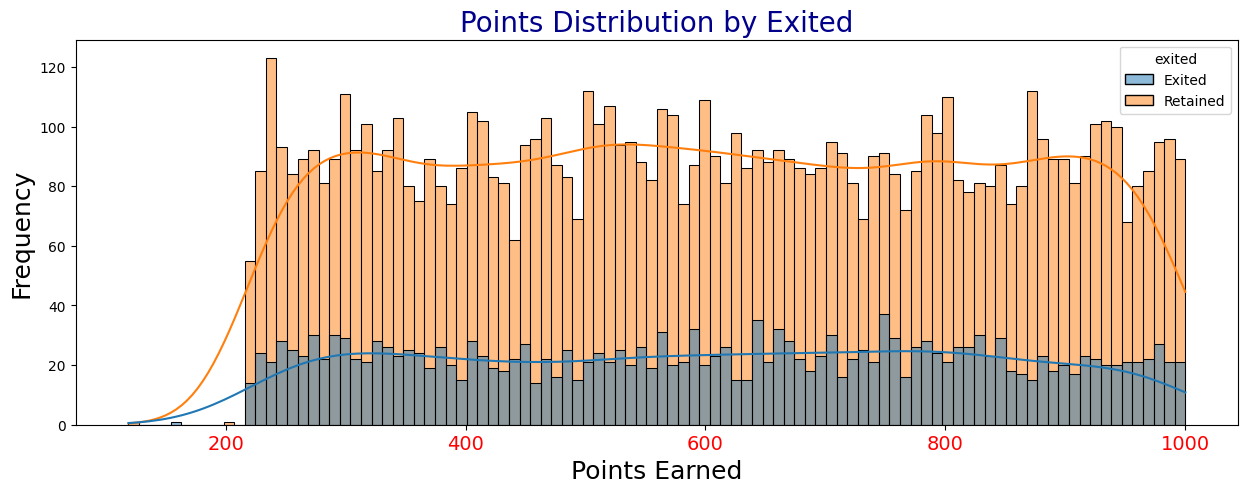

In [87]:
plt.figure(figsize=(15, 5))

sns.histplot(data=df,
             x="points_earned",
             bins=100,
             kde=True,
             hue="exited")

plt.title("Points Distribution by Exited", fontsize=20, color="darkblue")
plt.xlabel("Points Earned", fontsize=18)
plt.ylabel("Frequency", fontsize=18)
plt.xticks(fontsize=14, color='red')

plt.show();

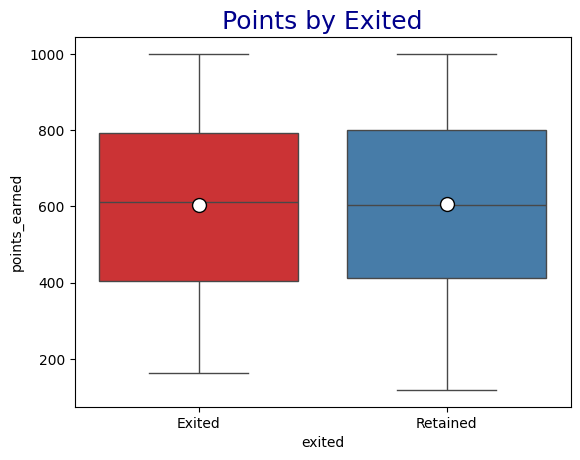

In [88]:
sns.boxplot(data=df,
            x="exited",
            y="points_earned",
            palette='Set1',
            hue='exited',
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white",
                       "markeredgecolor":"black",
                       "markersize":"10"})


plt.title("Points by Exited", fontsize=18, color='darkblue')

plt.show();

`Points earned` doesn't seem to play a role in predicting customer churn for this case.

---

In [89]:
df.head()

,credit_score,country,gender,age,tenure,balance,num_of_products,has_credit_card,is_active,estimated_salary,complained,satisfaction_score,card_type,points_earned,exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,2,DIAMOND,464,Exited
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,1,3,DIAMOND,456,Retained
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,3,DIAMOND,377,Exited
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,5,GOLD,350,Retained
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,5,GOLD,425,Retained


In [90]:
# Map labels to Data after EDA

label_mapping = {
    'Retained':0, 
    'Exited':1    
}
df['exited'] = df['exited'].replace(label_mapping)

df.head()

/tmp/ipykernel_18232/1040889476.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['exited'] = df['exited'].replace(label_mapping)


,credit_score,country,gender,age,tenure,balance,num_of_products,has_credit_card,is_active,estimated_salary,complained,satisfaction_score,card_type,points_earned,exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,2,DIAMOND,464,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,1,3,DIAMOND,456,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,3,DIAMOND,377,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,5,GOLD,350,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,5,GOLD,425,0


---

## Remove Irrelvant Columns

In [91]:
df.columns.tolist()

['credit_score',
 'country',
 'gender',
 'age',
 'tenure',
 'balance',
 'num_of_products',
 'has_credit_card',
 'is_active',
 'estimated_salary',
 'complained',
 'satisfaction_score',
 'card_type',
 'points_earned',
 'exited']

In [92]:
cols_to_drop = [
    'credit_score',
    'tenure',
    'has_credit_card',
    'estimated_salary',
    'satisfaction_score',
    'card_type',
    'points_earned'
]

In [93]:
df = df.drop(columns=cols_to_drop,axis=1)

In [94]:
df.head()

,country,gender,age,balance,num_of_products,is_active,complained,exited
0,France,Female,42,0.00,1,1,1,1
1,Spain,Female,41,83807.86,1,1,1,0
2,France,Female,42,159660.80,3,0,1,1
3,France,Female,39,0.00,2,0,0,0
4,Spain,Female,43,125510.82,1,1,0,0


---

## Data Encoding

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          10000 non-null  object 
 1   gender           10000 non-null  object 
 2   age              10000 non-null  int64  
 3   balance          10000 non-null  float64
 4   num_of_products  10000 non-null  int64  
 5   is_active        10000 non-null  int64  
 6   complained       10000 non-null  int64  
 7   exited           10000 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 625.1+ KB


In [96]:
df.head()

,country,gender,age,balance,num_of_products,is_active,complained,exited
0,France,Female,42,0.00,1,1,1,1
1,Spain,Female,41,83807.86,1,1,1,0
2,France,Female,42,159660.80,3,0,1,1
3,France,Female,39,0.00,2,0,0,0
4,Spain,Female,43,125510.82,1,1,0,0


## Handling Categorical Data

### Labelencoder - gender

In [97]:
from sklearn.preprocessing import LabelEncoder

In [98]:
lbl_encoder = LabelEncoder()

In [99]:
df['gender'] = lbl_encoder.fit_transform(df['gender'])

In [100]:
df

,country,gender,age,balance,num_of_products,is_active,complained,exited
0,France,0,42,0.00,1,1,1,1
1,Spain,0,41,83807.86,1,1,1,0
2,France,0,42,159660.80,3,0,1,1
3,France,0,39,0.00,2,0,0,0
4,Spain,0,43,125510.82,1,1,0,0
...,...,...,...,...,...,...,...,...
9995,France,1,39,0.00,2,0,0,0
9996,France,1,35,57369.61,1,1,0,0
9997,France,0,36,0.00,1,1,1,1
9998,Germany,1,42,75075.31,2,0,1,1


## OneHotEncoder - country

In [101]:
from sklearn.preprocessing import OneHotEncoder

In [102]:
oh_encoder = OneHotEncoder(sparse_output=False)

In [103]:
country_encoded = oh_encoder.fit_transform(df[['country']])

In [104]:
country_encoded

array([[1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [105]:
oh_encoder.get_feature_names_out(['country'])

array(['country_France', 'country_Germany', 'country_Spain'], dtype=object)

In [106]:
country_encoded_df = pd.DataFrame(country_encoded, columns=oh_encoder.get_feature_names_out(['country']))

In [107]:
country_encoded_df

,country_France,country_Germany,country_Spain
0,1.0,0.0,0.0
1,0.0,0.0,1.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,0.0,0.0,1.0
...,...,...,...
9995,1.0,0.0,0.0
9996,1.0,0.0,0.0
9997,1.0,0.0,0.0
9998,0.0,1.0,0.0


In [108]:
country_encoded_df = country_encoded_df.astype(int)

In [109]:
country_encoded_df

,country_France,country_Germany,country_Spain
0,1,0,0
1,0,0,1
2,1,0,0
3,1,0,0
4,0,0,1
...,...,...,...
9995,1,0,0
9996,1,0,0
9997,1,0,0
9998,0,1,0


In [110]:
df = pd.concat([df,country_encoded_df],axis=1)

In [111]:
df.head()

,country,gender,age,balance,num_of_products,is_active,complained,exited,country_France,country_Germany,country_Spain
0,France,0,42,0.00,1,1,1,1,1,0,0
1,Spain,0,41,83807.86,1,1,1,0,0,0,1
2,France,0,42,159660.80,3,0,1,1,1,0,0
3,France,0,39,0.00,2,0,0,0,1,0,0
4,Spain,0,43,125510.82,1,1,0,0,0,0,1


In [112]:
df = df.drop('country',axis=1)

In [113]:
df

,gender,age,balance,num_of_products,is_active,complained,exited,country_France,country_Germany,country_Spain
0,0,42,0.00,1,1,1,1,1,0,0
1,0,41,83807.86,1,1,1,0,0,0,1
2,0,42,159660.80,3,0,1,1,1,0,0
3,0,39,0.00,2,0,0,0,1,0,0
4,0,43,125510.82,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
9995,1,39,0.00,2,0,0,0,1,0,0
9996,1,35,57369.61,1,1,0,0,1,0,0
9997,0,36,0.00,1,1,1,1,1,0,0
9998,1,42,75075.31,2,0,1,1,0,1,0


---

## Correlation Check

In [115]:
corr = df.corr()['exited'].sort_values(ascending=False)
print(corr)

exited             1.000000
complained         0.995693
age                0.285296
country_Germany    0.173313
balance            0.118577
num_of_products   -0.047611
country_Spain     -0.052800
country_France    -0.104688
gender            -0.106267
is_active         -0.156356
Name: exited, dtype: float64


In [116]:
df = df.drop('complained',axis=1)

---

## Declare Dependent Variable & Independent Variables

In [117]:
X = df.drop(columns='exited')

In [118]:
y = df['exited']

In [119]:
X.head()

,gender,age,balance,num_of_products,is_active,country_France,country_Germany,country_Spain
0,0,42,0.00,1,1,1,0,0
1,0,41,83807.86,1,1,0,0,1
2,0,42,159660.80,3,0,1,0,0
3,0,39,0.00,2,0,1,0,0
4,0,43,125510.82,1,1,0,0,1


In [120]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: exited, dtype: int64

---

# Train Test Split

In [121]:
from sklearn.model_selection import train_test_split

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [123]:
X_train.shape, y_train.shape

((8000, 8), (8000,))

In [124]:
X_test.shape, y_test.shape

((2000, 8), (2000,))

---

# Scale Data

In [125]:
from sklearn.preprocessing import StandardScaler

In [126]:
scaler = StandardScaler()

In [127]:
X_train = scaler.fit_transform(X_train)

In [128]:
X_test = scaler.transform(X_test)

In [129]:
X_train

array([[ 0.91324755, -0.6557859 , -1.21847056, ...,  1.00150113,
        -0.57946723, -0.57638802],
       [ 0.91324755,  0.29493847,  0.69683765, ..., -0.99850112,
         1.72572313, -0.57638802],
       [ 0.91324755, -1.41636539,  0.61862909, ..., -0.99850112,
        -0.57946723,  1.73494238],
       ...,
       [-1.09499335, -0.08535128, -1.21847056, ...,  1.00150113,
        -0.57946723, -0.57638802],
       [ 0.91324755,  0.3900109 ,  1.8272593 , ...,  1.00150113,
        -0.57946723, -0.57638802],
       [ 0.91324755,  1.15059039,  1.1497197 , ..., -0.99850112,
         1.72572313, -0.57638802]])

In [130]:
X_test

array([[ 0.91324755, -0.6557859 ,  0.32993735, ..., -0.99850112,
         1.72572313, -0.57638802],
       [ 0.91324755,  0.3900109 , -1.21847056, ...,  1.00150113,
        -0.57946723, -0.57638802],
       [-1.09499335,  0.48508334, -1.21847056, ..., -0.99850112,
        -0.57946723,  1.73494238],
       ...,
       [-1.09499335,  0.77030065, -1.21847056, ...,  1.00150113,
        -0.57946723, -0.57638802],
       [ 0.91324755, -0.94100321, -1.21847056, ...,  1.00150113,
        -0.57946723, -0.57638802],
       [ 0.91324755,  0.00972116,  0.62825602, ..., -0.99850112,
         1.72572313, -0.57638802]])

---

# ANN

In [131]:
# Currently using tf-nightly because tensorflow 2.20.0 still doesn't fully support RTX5070 - 20251125

In [132]:
# CUDA: 12.5
# CUDNN: 9.3

In [133]:
# Fallback on CPU - 20251125
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [134]:
# import tensorflow.keras as tf
from keras.models import Sequential
from keras.layers import Dense, Input

2026-01-05 12:56:00.887193: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2026-01-05 12:56:00.936868: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2026-01-05 12:56:00.936927: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2026-01-05 12:56:00.938341: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2026-01-05 12:56:00.948510: I tensorflow/core/platform/cpu_feature_guar

### ANN Modelling

In [135]:
# Total Number of Inputs
X_train.shape[1]

8

In [136]:
model = Sequential([
    Input(shape=(X_train.shape[1],)),

    # HL1: Connected to Input Layer
    Dense(64, activation='relu'),

    # HL2
    Dense(32, activation='relu'),

    # HL3 - Output Layer
    Dense(1, activation='sigmoid')

])

2026-01-05 12:56:05.839791: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:274] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


In [137]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                576       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2689 (10.50 KB)
Trainable params: 2689 (10.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [138]:
from keras.optimizers import Adam
from keras.losses import BinaryCrossentropy

In [139]:
adam = Adam(learning_rate=0.01)

In [140]:
bicrossentropy = BinaryCrossentropy()

In [141]:
model.compile(
    optimizer=adam, 
    loss=bicrossentropy, 
    metrics=['accuracy']
)

### TensorBoard

In [142]:
from keras.callbacks import EarlyStopping, TensorBoard

In [143]:
import datetime

log_dir = 'logs/fit/'+datetime.datetime.now().strftime('%Y%m%d-%H%M%S')

In [144]:
tensorboard_cb = TensorBoard(log_dir=log_dir, histogram_freq=1, write_graph=True)
earlystopping_cb = EarlyStopping(monitor='val_loss', patience=5,restore_best_weights=True)

In [145]:
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_test,y_test),
    epochs=100,
    callbacks=[tensorboard_cb,earlystopping_cb]
)

Epoch 1/100
250/250 [==============================] - 3s 7ms/step - loss: 0.3799 - accuracy: 0.8400 - val_loss: 0.3872 - val_accuracy: 0.8525
Epoch 2/100
250/250 [==============================] - 1s 4ms/step - loss: 0.3536 - accuracy: 0.8550 - val_loss: 0.3482 - val_accuracy: 0.8595
Epoch 3/100
250/250 [==============================] - 1s 4ms/step - loss: 0.3499 - accuracy: 0.8591 - val_loss: 0.3510 - val_accuracy: 0.8580
Epoch 4/100
250/250 [==============================] - 1s 4ms/step - loss: 0.3437 - accuracy: 0.8619 - val_loss: 0.3443 - val_accuracy: 0.8615
Epoch 5/100
250/250 [==============================] - 1s 5ms/step - loss: 0.3415 - accuracy: 0.8621 - val_loss: 0.3370 - val_accuracy: 0.8610
Epoch 6/100
250/250 [==============================] - 1s 4ms/step - loss: 0.3388 - accuracy: 0.8608 - val_loss: 0.3358 - val_accuracy: 0.8600
Epoch 7/100
250/250 [==============================] - 1s 5ms/step - loss: 0.3430 - accuracy: 0.8597 - val_loss: 0.3378 - val_accuracy: 0.8605

---

# Exporting Components

In [146]:
import pickle
pickle.dump(oh_encoder, open('oh_encoder.pkl', 'wb'))
pickle.dump(lbl_encoder, open('lbl_encoder.pkl', 'wb'))
pickle.dump(scaler, open('scaler.pkl', 'wb'))

# Export `.keras` file --- ANN Model

In [147]:
model.save('ann_model.keras')

---

## Tensorboard

In [148]:
%load_ext tensorboard

In [149]:
# The tensorboard ext has to be called twice to start working - 20251126
%tensorboard --logdir logs/fit
%tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 19178), started 0:00:00 ago. (Use '!kill 19178' to kill it.)

---

# Model Prediction: ANN

In [150]:
df.columns.tolist()

['gender',
 'age',
 'balance',
 'num_of_products',
 'is_active',
 'exited',
 'country_France',
 'country_Germany',
 'country_Spain']

In [151]:
df.head()

,gender,age,balance,num_of_products,is_active,exited,country_France,country_Germany,country_Spain
0,0,42,0.00,1,1,1,1,0,0
1,0,41,83807.86,1,1,0,0,0,1
2,0,42,159660.80,3,0,1,1,0,0
3,0,39,0.00,2,0,0,1,0,0
4,0,43,125510.82,1,1,0,0,0,1


In [163]:
data_input = {
 'gender':'Female',
 'age':45,
 'balance':200000,
 'num_of_products':4,
 'is_active':0,
 'country':'Germany'
}

In [164]:
country_encoded_df

,country_France,country_Germany,country_Spain
0,1,0,0
1,0,0,1
2,1,0,0
3,1,0,0
4,0,0,1
...,...,...,...
9995,1,0,0
9996,1,0,0
9997,1,0,0
9998,0,1,0


In [165]:
country_input_encoded = oh_encoder.transform([[data_input['country']]])

/home/iceyisaak/anaconda3/envs/ann-bank-customer-churn-prediction/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


In [166]:
country_input_encoded_df = pd.DataFrame(country_input_encoded, columns=oh_encoder.get_feature_names_out(['country']))

In [167]:
country_input_encoded_df

,country_France,country_Germany,country_Spain
0,0.0,1.0,0.0


In [168]:
input_df = pd.DataFrame([data_input])
input_df

,gender,age,balance,num_of_products,is_active,country
0,Female,45,200000,4,0,Germany


In [169]:
# LabelEncode - gender input
input_df['gender'] = lbl_encoder.transform(input_df['gender'])

In [170]:
input_df

,gender,age,balance,num_of_products,is_active,country
0,0,45,200000,4,0,Germany


In [171]:
input_df = pd.concat([input_df.drop('country', axis=1), country_input_encoded_df], axis=1)

In [172]:
input_df

,gender,age,balance,num_of_products,is_active,country_France,country_Germany,country_Spain
0,0,45,200000,4,0,0.0,1.0,0.0


### Scaling Input

In [173]:
input_scaled = scaler.transform(input_df)

In [174]:
input_scaled

array([[-1.09499335,  0.58015577,  1.98372734,  4.25868381, -1.02583358,
        -0.99850112,  1.72572313, -0.57638802]])

### Prediction

In [175]:
pred = model.predict(input_scaled)

1/1 [==============================] - 0s 109ms/step


In [176]:
pred_proba = pred[0][0]

In [177]:
pred_proba

0.9999983

In [178]:
if pred_proba > 0.5:
    print('The customer is likely to churn.')
else:
    print('The customer is NOT likely to churn.')

The customer is likely to churn.


---

## Evaluation

In [179]:
# 1. Predict on the WHOLE test set
y_pred_probs = model.predict(X_test) 

# 2. Convert all probabilities to 0 or 1
y_pred = (y_pred_probs > 0.5).astype("int32")

# 3. Run the evaluation
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
print(f"Accuracy Score: {accuracy_score(y_test, y_pred):.4f}")

# Classification Report:
print("\nClassification Report:\n", classification_report(y_test, y_pred))

63/63 [==============================] - 0s 2ms/step
Confusion Matrix:
 [[1557   50]
 [ 218  175]]
Accuracy Score: 0.8660

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.78      0.45      0.57       393

    accuracy                           0.87      2000
   macro avg       0.83      0.71      0.74      2000
weighted avg       0.86      0.87      0.85      2000



63/63 [==============================] - 0s 3ms/step


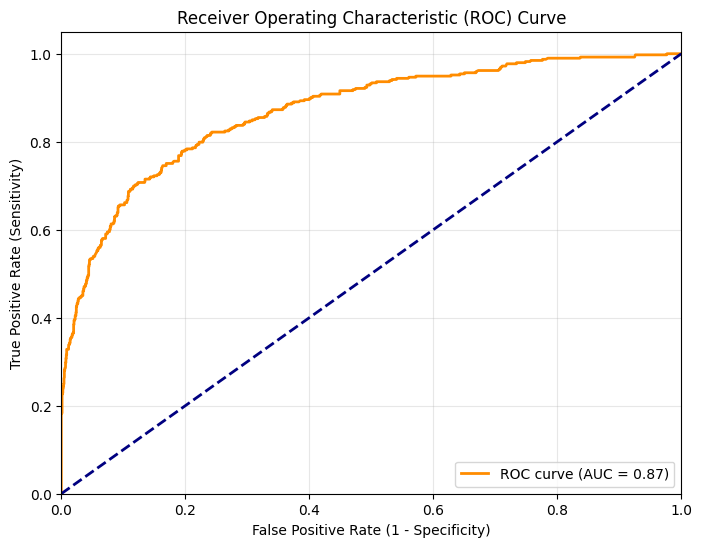

In [182]:
from sklearn.metrics import roc_curve, auc

# 1. Get probabilities from the model
# Ensure you are using X_test_scaled (the whole test set)
y_pred_probs = model.predict(X_test).ravel() 

# 2. Calculate FPR, TPR, and Thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

# 3. Calculate the Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)

# 4. Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') # Random guess line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

---